In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
apple_stk=pd.read_csv("AAPL.csv")

In [3]:
a = apple_stk
size = int(len(a) * 0.75)
print(size)
Train, Test = a[0:size], a[size:len(a)]

1508


In [6]:
apple_stk['Close']=apple_stk['Close'].astype('float32')

In [7]:
apple_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float32
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float32(1), float64(4), int64(1), object(1)
memory usage: 102.2+ KB


In [8]:
X = apple_stk['Close'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


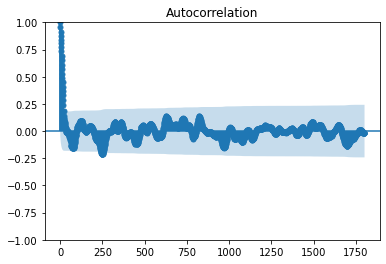

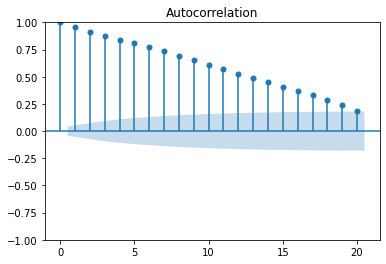

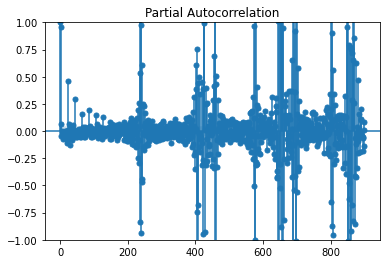

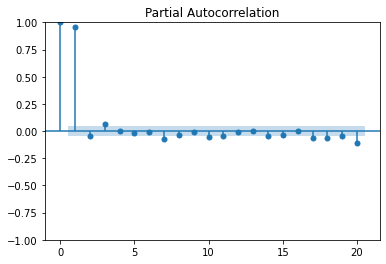

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff(21).dropna(),lags=1800)
plot_acf(apple_stk.Close.diff(21).dropna(),lags=20)
plot_pacf(apple_stk.Close.diff(21).dropna(),lags=900)
plot_pacf(apple_stk.Close.diff(21).dropna(),lags=20)
plt.show() 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


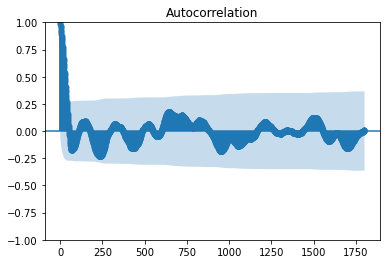

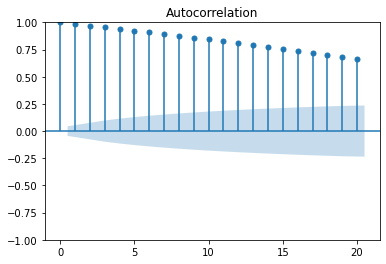

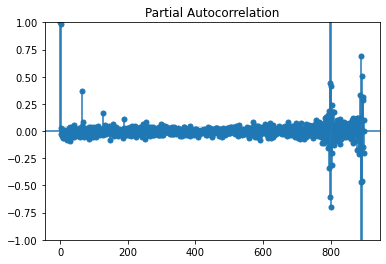

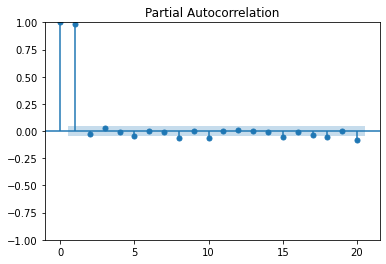

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(apple_stk.Close.diff(63).dropna(),lags=1800)
plot_acf(apple_stk.Close.diff(63).dropna(),lags=20)
plot_pacf(apple_stk.Close.diff(63).dropna(),lags=900)
plot_pacf(apple_stk.Close.diff(63).dropna(),lags=20)
plt.show() 

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(1,1,0,21))
res=sarima.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 21)   Log Likelihood               -3085.313
Date:                            Mon, 10 Apr 2023   AIC                           6174.626
Time:                                    22:23:32   BIC                           6185.233
Sample:                                         0   HQIC                          6178.579
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L21      -0.4745      0.018    -26.666      0.000      -0.509      -0.440
sigma2         3.7099      0.101     36.749      0.000       3.512       3.908
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):               171.66
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.558
Test RMSE: 24.006


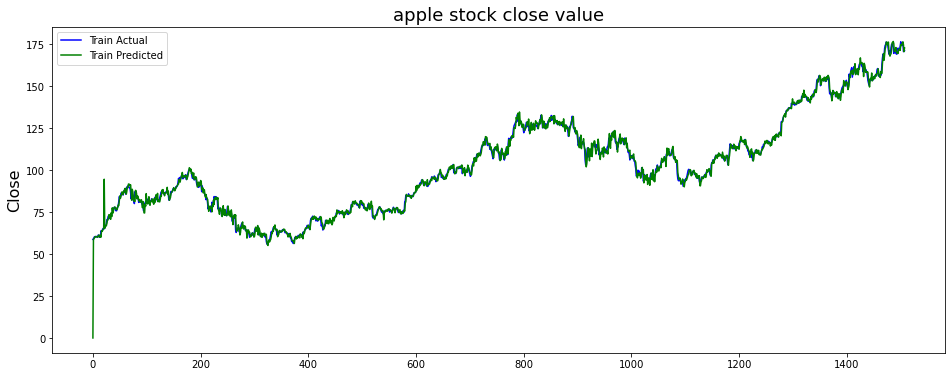

In [14]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

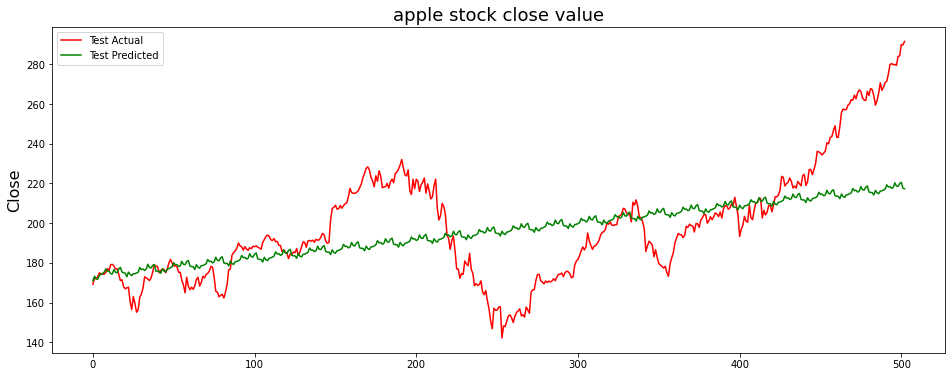

In [15]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(1,1,0,63))
res=sarima.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2944.582
Date:                            Mon, 10 Apr 2023   AIC                           5893.163
Time:                                    22:24:39   BIC                           5903.714
Sample:                                         0   HQIC                          5897.101
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L63      -0.5248      0.018    -28.375      0.000      -0.561      -0.489
sigma2         3.4090      0.076     44.569      0.000       3.259       3.559
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               738.98
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [17]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.481
Test RMSE: 46.548


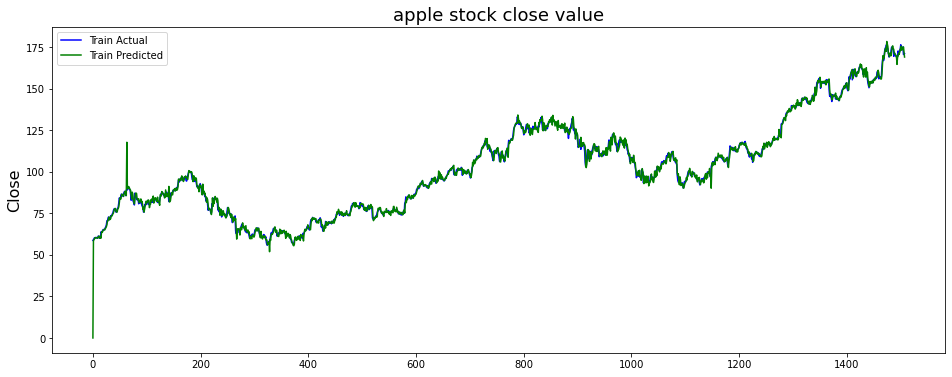

In [18]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

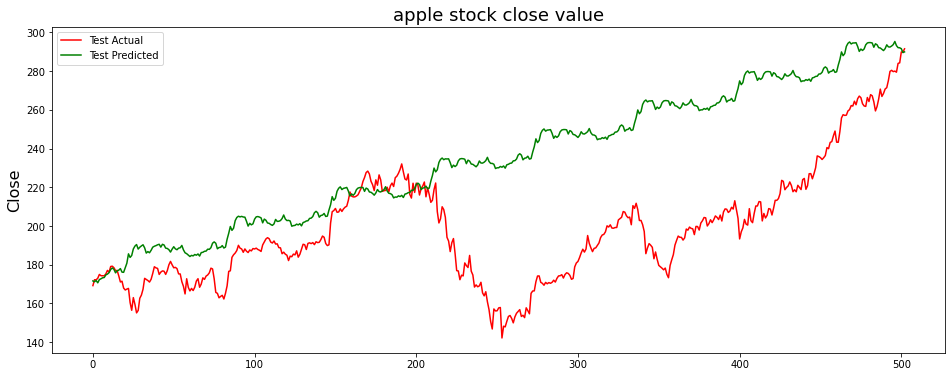

In [19]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(2,1,0,21))
res=sarima.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 21)   Log Likelihood               -2980.370
Date:                            Mon, 10 Apr 2023   AIC                           5966.739
Time:                                    22:32:45   BIC                           5982.651
Sample:                                         0   HQIC                          5972.670
                                           - 1508                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L21      -0.6471      0.020    -31.602      0.000      -0.687      -0.607
ar.S.L42      -0.3671      0.019    -18.854      0.000      -0.405      -0.329
sigma2         3.2082      0.083     38.596      0.000       3.045       3.371
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):               261.69
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [32]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.461
Test RMSE: 34.346


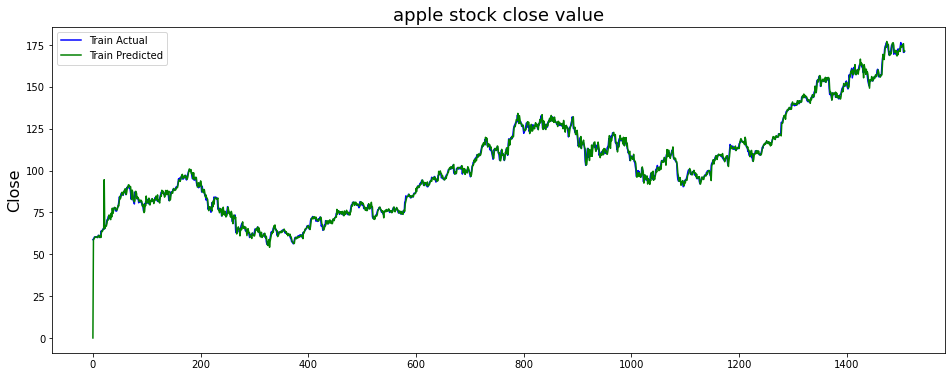

In [33]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

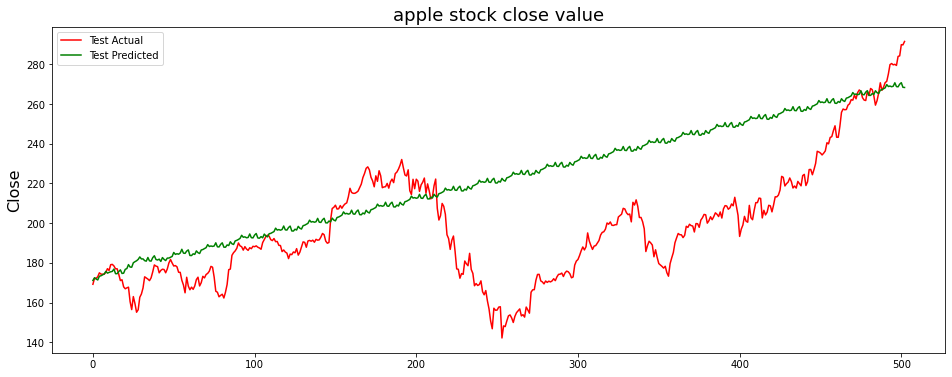

In [34]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(1,2,1,63))
res=sarima.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(1, 2, [1], 63)   Log Likelihood               -2967.990
Date:                              Mon, 10 Apr 2023   AIC                           5941.979
Time:                                      22:42:10   BIC                           5957.671
Sample:                                           0   HQIC                          5947.849
                                             - 1508                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L63      -0.5046      0.020    -25.720      0.000      -0.543      -0.466
ma.S.L63      -0.9994      5.052     -0.198      0.843     -10.901       8.902
sigma2         3.5560     17.954      0.198      0.843     -31.632      38.744
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               643.15
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.18
Prob(H) (two-sided):                  0.28   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [38]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.976
Test RMSE: 45.616


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, 
                 order=(0,1,0),
                seasonal_order=(1,1,1,63))
res=sarima.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1508
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 63)   Log Likelihood               -2776.985
Date:                              Mon, 10 Apr 2023   AIC                           5559.970
Time:                                      23:00:02   BIC                           5575.795
Sample:                                           0   HQIC                          5565.877
                                             - 1508                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L63      -0.0086      0.028     -0.311      0.756      -0.063       0.046
ma.S.L63      -0.9201      0.021    -42.929      0.000      -0.962      -0.878
sigma2         2.5261      0.064     39.342      0.000       2.400       2.652
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               635.10
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.18
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
spredictions_trn = res.predict(start = Train.index[0],end = Train.index[-1])
spredictions_tst = res.predict(start = Test.index[0],end = Test.index[-1])

In [42]:
SA_rmse_tr = sqrt(mean_squared_error(train, spredictions_trn))
print('Train RMSE: %.3f' % SA_rmse_tr)
SA_rmse_ts = sqrt(mean_squared_error(test, spredictions_tst))
print('Test RMSE: %.3f' % SA_rmse_ts)

Train RMSE: 2.339
Test RMSE: 23.901


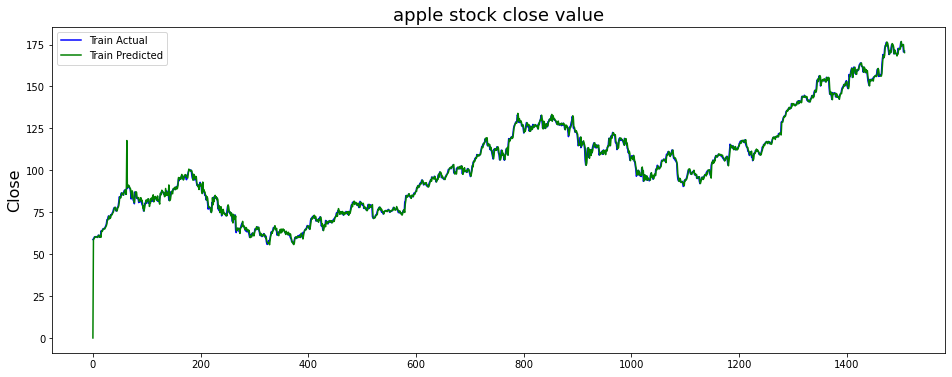

In [43]:
plt.figure(figsize=(16,6))
plt.plot(train, label="Train Actual", color='blue')
plt.plot(spredictions_trn, label="Train Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()

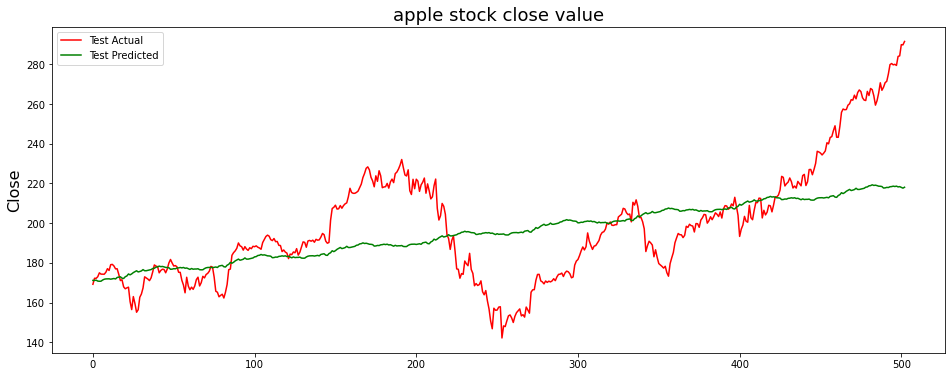

In [44]:
plt.figure(figsize=(16,6))
plt.plot(test, label="Test Actual", color='red')
plt.plot(spredictions_tst, label="Test Predicted", color='green')
plt.title('apple stock close value', fontsize=18)
plt.ylabel('Close', fontsize=16)
plt.legend()